In [1]:
import osmnx as ox
import networkx as nx
import random
import math
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

Average Baseline revenue for the last 100 days :  1491.6954383272716


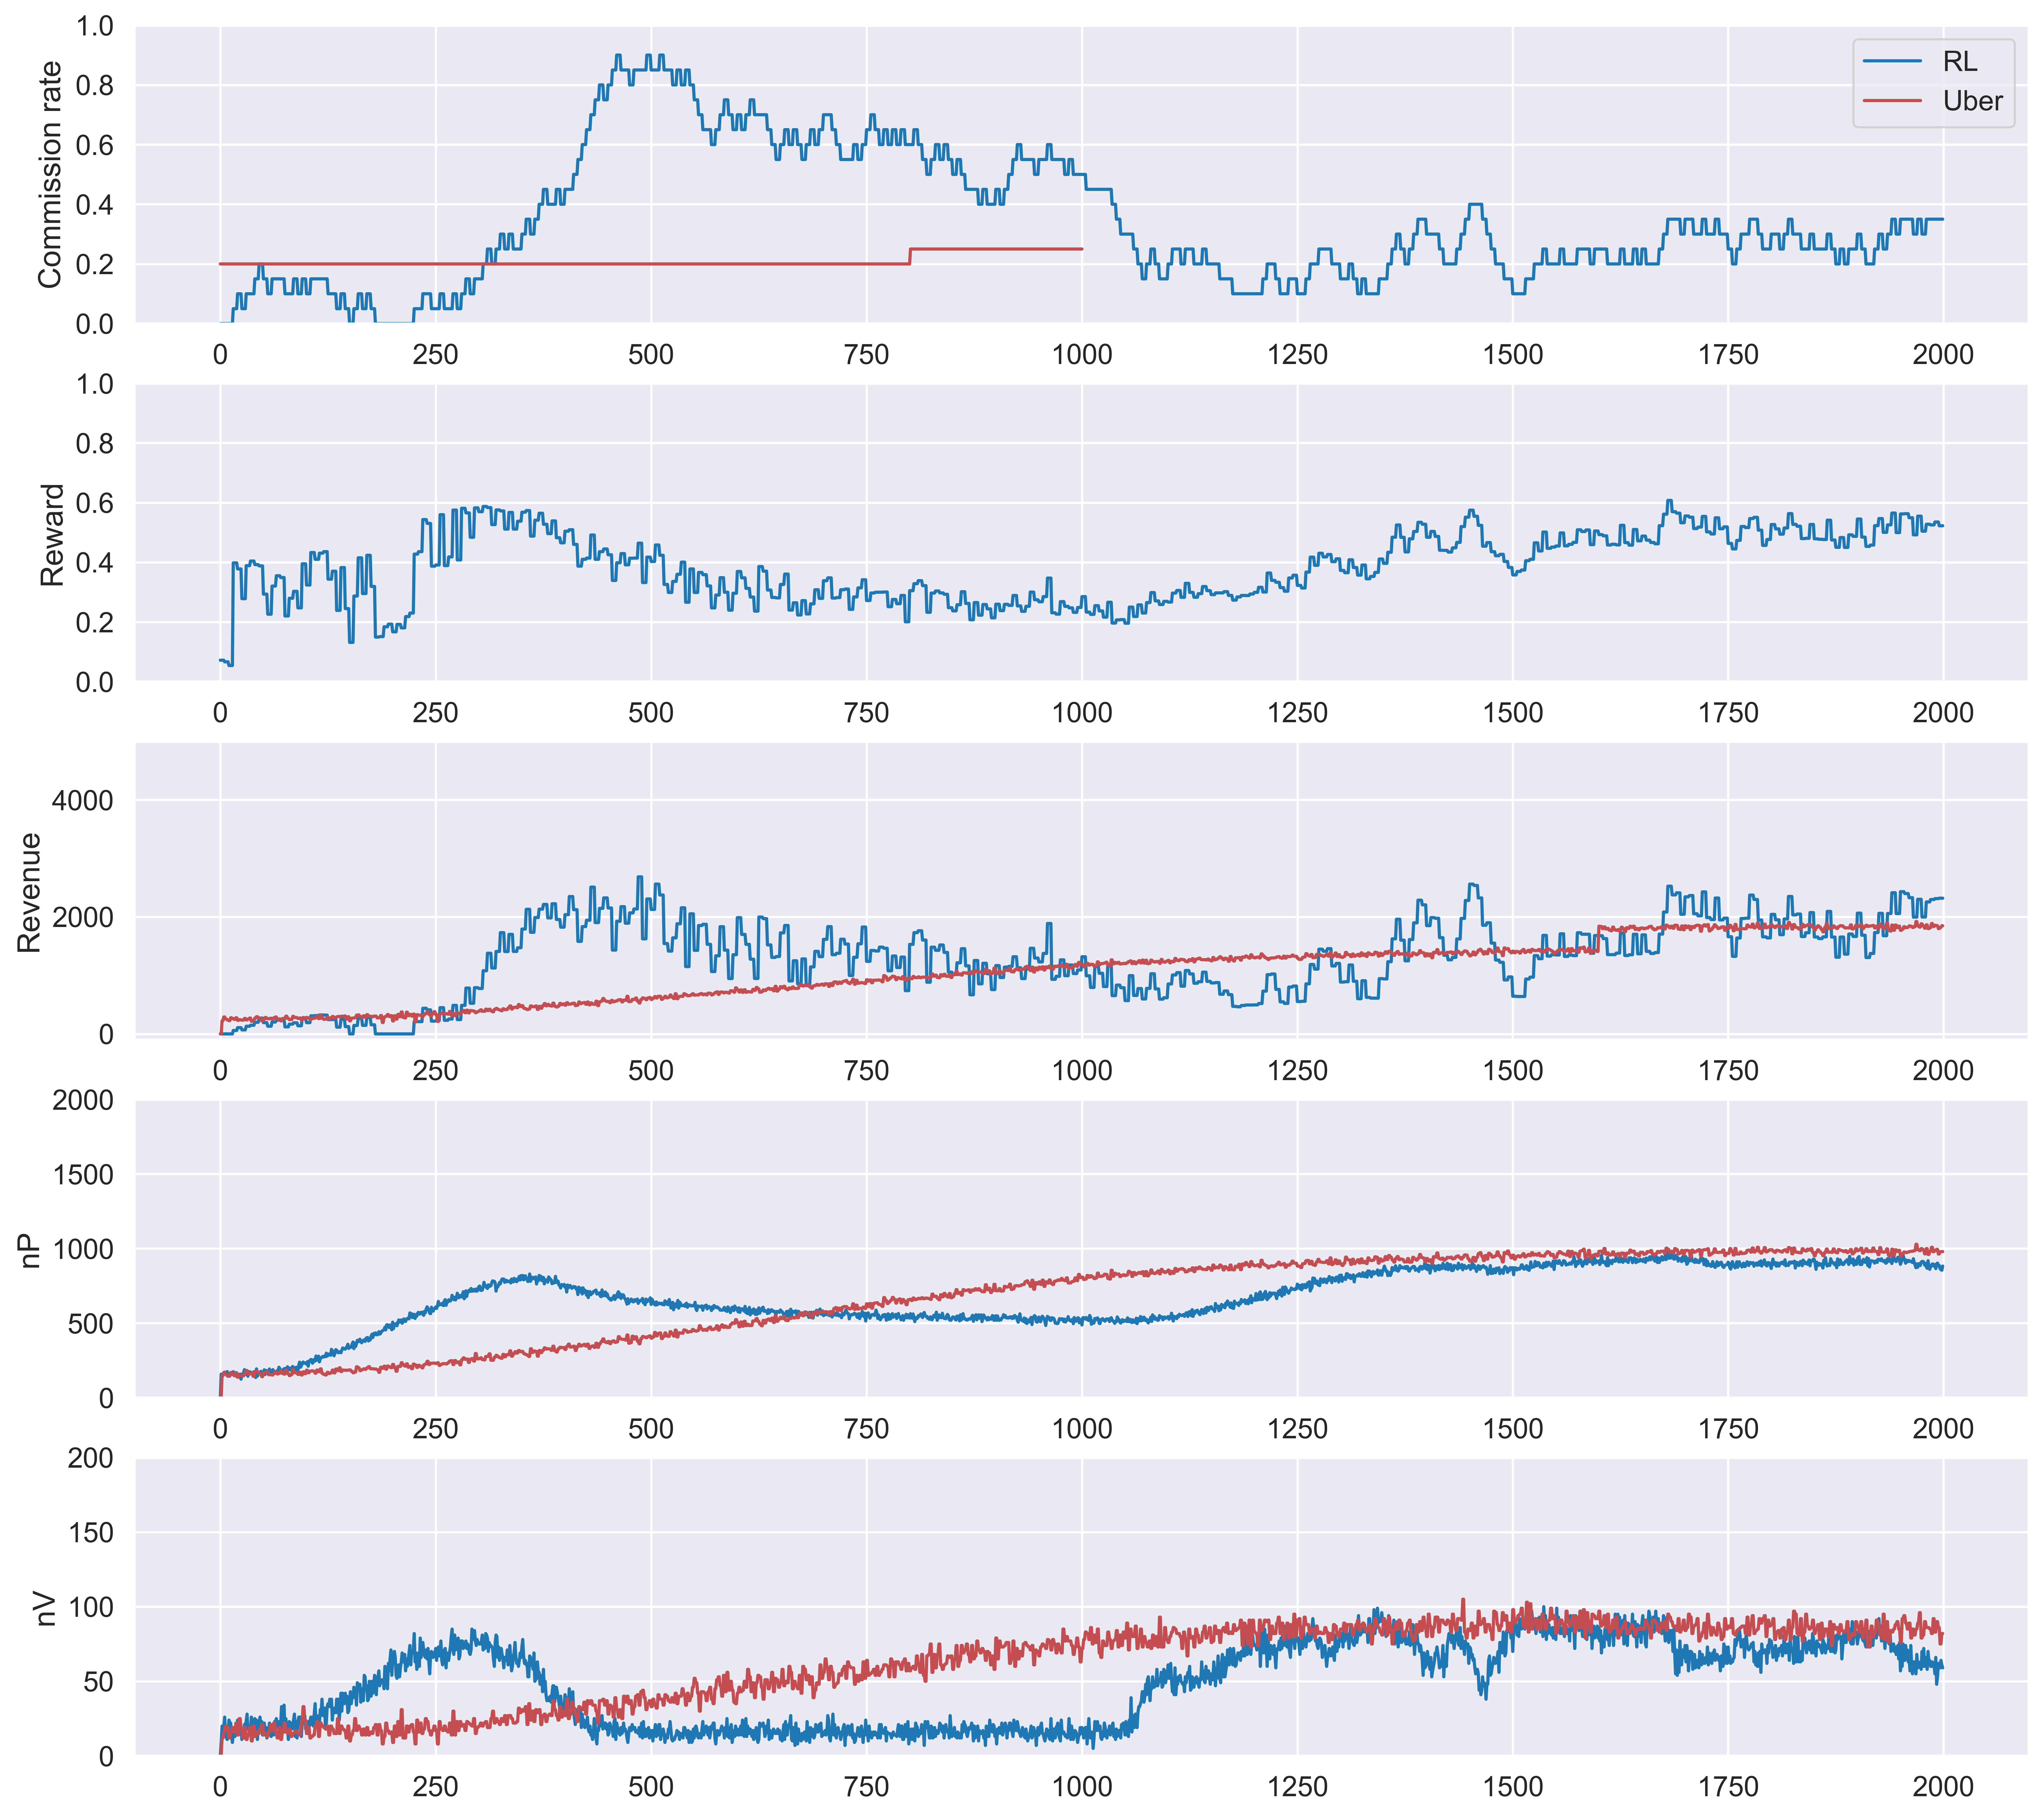

In [7]:
run_id = 15
ld = 2000
rl = pd.read_csv('csv/rl_run_{}.csv'.format(run_id))[:ld]
d = pd.read_csv('csv/demand_run_{}.csv'.format(run_id))[:ld]
s = pd.read_csv('csv/supply_run_{}.csv'.format(run_id))[:ld]

sns.set(rc={"figure.dpi":500, 'savefig.dpi':500})
sns.set(palette='tab10',font_scale=1.2)
fig, ax = plt.subplots(nrows=5, figsize=(16,15))

sns.lineplot(x=rl.index , y=rl.comm_rate, label='RL', ax=ax[0])
sns.lineplot(x=rl.index , y=rl.reward, ax=ax[1])

sns.lineplot(x=rl.index , y=rl.revenue, ax=ax[2])
sns.lineplot(x=d.index , y=d.OUT, ax=ax[3])
sns.lineplot(x=s.index , y=s.OUT, ax=ax[4])

ax[0].set(ylim=(0,1), ylabel='Commission rate')
ax[1].set(ylim=(0,1), ylabel='Reward'); ax[2].set(ylim=(-100,5000), ylabel='Revenue')
ax[3].set(ylim=(0,2000), ylabel='nP')
ax[4].set(ylim=(0,200), ylabel='nV')

db = pd.read_csv('csv/demand_run_baseline.csv')
sb = pd.read_csv('csv/supply_run_baseline.csv')

sns.lineplot(x=[0,800, 801, 1000] , y=[0.20,0.20, 0.25,0.25], c='r', label='Uber', ax=ax[0])
sns.lineplot(x=db.index , y=db.plat_revenue, c='r', ax=ax[2])
sns.lineplot(x=db.index , y=db.OUT, c='r', ax=ax[3])
sns.lineplot(x=sb.index , y=sb.OUT, c='r', ax=ax[4])

# print('Average RL revenue for the last 100 days : ', d.plat_revenue[1900:].mean())
print('Average Baseline revenue for the last 100 days : ', db.plat_revenue[900:].mean())

# plt.savefig("RL_results.png")

In [6]:
db = pd.read_csv('csv/demand_run_baseline.csv')
sb = pd.read_csv('csv/supply_run_baseline.csv')

db = db.loc[db.index.repeat(2)].reset_index(drop=True)
sb = sb.loc[sb.index.repeat(2)].reset_index(drop=True)

db.to_csv('csv/demand_run_baseline.csv')
sb.to_csv('csv/supply_run_baseline.csv')

In [4]:
df = pd.DataFrame()
for i in range(0,400):
    for t in range(0,5):
        df = pd.concat([df, rl[i:i+1]])
        
df.reset_index(inplace=True)
df.drop(['index','Unnamed: 0'],inplace=True ,axis=1)
df.to_csv('csv/rl_run_16.csv')
df

,state,action,revenue,reward,next_state,nP,nV,fare,comm_rate,discount,Marketing
0,[[0 0 0]],2,0.00000,0.062000,[[172. 20. 0.]],172,20,1.2,0.0,0.0,True
1,[[0 0 0]],2,0.00000,0.062000,[[172. 20. 0.]],172,20,1.2,0.0,0.0,True
2,[[0 0 0]],2,0.00000,0.062000,[[172. 20. 0.]],172,20,1.2,0.0,0.0,True
3,[[0 0 0]],2,0.00000,0.062000,[[172. 20. 0.]],172,20,1.2,0.0,0.0,True
4,[[0 0 0]],2,0.00000,0.062000,[[172. 20. 0.]],172,20,1.2,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
1995,[[7.73e+02 5.90e+01 2.50e-01]],0,1805.83296,0.427631,[[7.91e+02 6.40e+01 3.00e-01]],791,64,1.2,0.3,0.0,False
1996,[[7.73e+02 5.90e+01 2.50e-01]],0,1805.83296,0.427631,[[7.91e+02 6.40e+01 3.00e-01]],791,64,1.2,0.3,0.0,False
1997,[[7.73e+02 5.90e+01 2.50e-01]],0,1805.83296,0.427631,[[7.91e+02 6.40e+01 3.00e-01]],791,64,1.2,0.3,0.0,False
1998,[[7.73e+02 5.90e+01 2.50e-01]],0,1805.83296,0.427631,[[7.91e+02 6.40e+01 3.00e-01]],791,64,1.2,0.3,0.0,False


4519.929200932196

In [4]:
rl.revenue[380:].mean()

2053.2812409999997

In [15]:
(2053.2812409999997-1831.7685830000003)/1831.7685830000003

0.12092829850658018

In [32]:
round(2.345,2)

2.35

In [ ]:
max_revenue=1
revenue = 0


In [ ]:
reward = ((1/3)*revenue/max_revenue)+((1/3)*nV/nP)+((1/3)*nV/params.nV)

In [2]:
df = pd.read_csv('csv/supply_run_1.csv')
df

,Unnamed: 0,EXPERIENCE_U,WOM_U,MARKETING_U,OUT,nRIDES,nREJECTED,nDAYS_WORKED,DRIVING_TIME,IDLE_TIME,...,IS_REJECTED_BY_TRAVELLER,ARRIVES_AT_PICKUP,MEETS_TRAVELLER_AT_PICKUP,DEPARTS_FROM_PICKUP,ARRIVES_AT_DROPOFF,CONTINUES_SHIFT,STARTS_REPOSITIONING,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT
0,0,0.010000,0.010000,0.011646,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.010000,0.010000,0.013414,7.0,7.285714,0.0,1.000000,7478.571429,13653.285714,...,0.0,3613.857143,0.0,218.571429,3864.714286,0.0,0.0,0.0,0.0,7495.285714
2,2,0.010031,0.010000,0.015666,7.0,9.000000,0.0,1.142857,9101.142857,11925.714286,...,0.0,3992.714286,0.0,270.000000,5108.428571,0.0,0.0,0.0,0.0,7516.571429
3,3,0.010065,0.010000,0.018635,3.0,11.333333,0.0,1.000000,13643.666667,7363.000000,...,0.0,6615.333333,0.0,340.000000,7028.333333,0.0,0.0,0.0,0.0,6341.666667
4,4,0.010113,0.010000,0.021597,4.0,12.000000,0.0,1.250000,12779.500000,8155.500000,...,0.0,6079.250000,0.0,360.000000,6700.250000,0.0,0.0,0.0,0.0,6440.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.010000,0.010141,0.773877,6.0,16.833333,0.0,30.500000,14283.166667,6458.000000,...,0.0,5961.833333,0.0,505.000000,8321.333333,0.0,0.0,0.0,0.0,6246.833333
996,996,0.010000,0.010141,0.773877,6.0,17.666667,0.0,36.166667,14195.833333,6487.833333,...,0.0,5454.333333,0.0,530.000000,8741.500000,0.0,0.0,0.0,0.0,6276.500000
997,997,0.010000,0.010141,0.773877,9.0,15.000000,0.0,29.777778,13572.333333,7211.111111,...,0.0,6042.111111,0.0,450.000000,7530.222222,0.0,0.0,0.0,0.0,6511.777778
998,998,0.010000,0.010141,0.773877,5.0,16.400000,0.0,34.600000,14235.000000,6518.600000,...,0.0,5894.400000,0.0,492.000000,8340.600000,0.0,0.0,0.0,0.0,6312.000000


In [3]:
df.columns

Index(['Unnamed: 0', 'EXPERIENCE_U', 'WOM_U', 'MARKETING_U', 'OUT', 'nRIDES',
       'nREJECTED', 'nDAYS_WORKED', 'DRIVING_TIME', 'IDLE_TIME', 'PICKUP_DIST',
       'DRIVING_DIST', 'REVENUE', 'COST', 'COMMISSION', 'TRIP_FARE',
       'ACTUAL_INC', 'mu', 'INFORMED', 'working_U', 'working_P',
       'OUT_TOMORROW', 'STARTS_DAY', 'OPENS_APP', 'RECEIVES_REQUEST',
       'ACCEPTS_REQUEST', 'REJECTS_REQUEST', 'IS_ACCEPTED_BY_TRAVELLER',
       'IS_REJECTED_BY_TRAVELLER', 'ARRIVES_AT_PICKUP',
       'MEETS_TRAVELLER_AT_PICKUP', 'DEPARTS_FROM_PICKUP',
       'ARRIVES_AT_DROPOFF', 'CONTINUES_SHIFT', 'STARTS_REPOSITIONING',
       'REPOSITIONED', 'DECIDES_NOT_TO_DRIVE', 'ENDS_SHIFT'],
      dtype='object')

In [78]:
e = 1
for i in range(0,100):
    e = e*0.98
    
e

0.132619555894753